In [4]:
import torch
from torchvision.datasets import MNIST, FashionMNIST
from torchvision import transforms
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable
from models import EncoderNet, TripletNet
import matplotlib.pyplot as plt

In [5]:
mean, std = 0.1307, 0.3081

mnist_train_dataset = MNIST('../data/MNIST', train=True, download=True,
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))
mnist_test_dataset = MNIST('../data/MNIST', train=False, download=True,
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((mean,), (std,))
                            ]))

fmnist_train_dataset = FashionMNIST('../data/FashionMNIST', train=True, download=True,
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))
fmnist_test_dataset = FashionMNIST('../data/FashionMNIST', train=False, download=True,
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((mean,), (std,))
                            ]))


In [6]:
for idx, item in enumerate(fmnist_train_dataset.targets):
    fmnist_train_dataset.targets[idx] = fmnist_train_dataset.targets[idx]+10
    
for idx, item in enumerate(fmnist_test_dataset.targets):
    fmnist_test_dataset.targets[idx] = fmnist_test_dataset.targets[idx]+10

In [7]:
fmnist_test_dataset.targets[0]

tensor(19)

In [8]:
combined_train_dataset = torch.utils.data.ConcatDataset([mnist_train_dataset, fmnist_train_dataset])
combined_test_dataset = torch.utils.data.ConcatDataset([mnist_test_dataset, fmnist_test_dataset])

In [9]:
len(combined_test_dataset)

20000

In [10]:
batch_size = 128
cuda = torch.cuda.is_available()
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
combined_train_loader = torch.utils.data.DataLoader(combined_train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
combined_test_loader = torch.utils.data.DataLoader(combined_test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [11]:
%matplotlib inline
from genereateTriplets import TripletMNIST, CombinedTriplet

combined_triplet_train_dataset = CombinedTriplet(combined_train_dataset, train=True) # Returns triplets of images
combined_triplet_test_dataset = CombinedTriplet(combined_test_dataset, train=False)


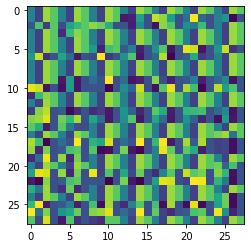

In [34]:
plt.imshow(combined_triplet_train_dataset[0][0][2])

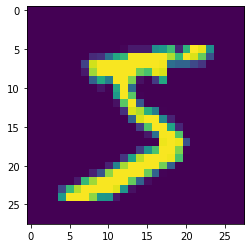

In [29]:
plt.imshow(combined_train_dataset[0][0].squeeze())